# Milestone 1

# Perkenalan

>- Nama      : Alsello Diveni Manuputty
>- Batch     : HCK 6 Pondok Indah
>- Phase     : 2
------
**Objective**
>Pada notebook ini akan dilakukan pengerjaan Milestone 1 fase 2 dimana akan dibuat model *Deep Learning Classification* untuk memprediksi `customer churn` dari layanan subscription suatu perusahaan sayur mayur. Pada kasus ini, analis ditugaskan untuk membuatkan sebuah model untuk memprediksi dari data yang berisi informasi umum dari *`subscriber`*. Karena resiko salah klasifikasi cukup fatal, maka perlu dilakukan *modelling* dengan berusaha untuk meningkatkan *`accuracy`* model. Dengan model ini, diharapkan perusahaan bisa meringankan kerja perusahaan dalam proses mitigasi customer churn dan bisa mengarahkan energi yang tersisa ke pekerjaan lain yang memang butuh seorang manusia untuk melakukannya.

**Link Deployment**
>Hasil dari notebook ini akan di deploy ke [link](https://huggingface.co/spaces/AlselloDM/Milestone_1_Phase_2) ini.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#untuk model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder,OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer

#evaluasi
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report

#saving
import pickle

np.random.seed(69)
tf.random.set_seed(69)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns', None)

# Data Loading

In [3]:
mentah =  pd.read_csv("churn.csv", parse_dates=['joining_date'], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d"))
mentah.head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [4]:
mentah.tail(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
# cek list kolom
mentah.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [6]:
# cek bentuk data
mentah.shape

(37010, 22)

In [7]:
# cek info data
mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  object        
 11  days_since_last_login       

In [8]:
# cek duplicates
mentah[mentah.duplicated()].shape

(18, 22)

Dari overview data terlihat ada beberapa data yang duplicate dan untuk kolom joining date tidak seharusnya dalam bentuk object. Untuk kolom last visit time juga dalam bentuk object namun sepertinya tidak terlalu berguna dalam permodelan sehingga diputuskan untuk di drop saja di bagian Data Cleaning.

Sebelum lanjut ke proses selanjutnya akan diambil data inference agar tidak mempersulit proses kedepannya.

In [9]:
# ambil data inference
inf = mentah.sample(10, random_state=69) 
inf 

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
10983,8599d15141f3ac72,12,F,City,Basic Membership,2017-06-08,Yes,Without Offers,Smartphone,Fiber_Optic,22:02:29,23,51.46,8345.14,15.000000,584.54,Yes,No,Yes,Solved in Follow-up,Poor Website,1
14751,a8b35e01ade18e60,51,F,Village,Gold Membership,2017-06-10,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,03:54:26,17,151.08,38989.88,34.216552,686.80,Yes,No,No,Not Applicable,No reason specified,1
5436,be813e86b6d64e71,17,F,Village,Basic Membership,2015-12-12,No,Credit/Debit Card Offers,Desktop,Mobile_Data,06:23:48,-999,243.46,49935.08,0.000000,621.46,No,Yes,Yes,No Information Available,No reason specified,1
11328,89c1aaef2889839a,52,M,City,Silver Membership,2015-02-18,NaN,Without Offers,Smartphone,Mobile_Data,15:50:16,20,71.38,26987.37,29.000000,678.09,No,Yes,Yes,Solved in Follow-up,No reason specified,1
36304,a502cc0b13030a48,33,M,Town,Gold Membership,2017-03-10,No,Without Offers,Desktop,Fiber_Optic,15:18:53,15,165.50,15980.55,13.000000,707.94,No,Yes,Yes,Unsolved,Poor Customer Service,1
33441,aaf10dc2b96163c1,40,F,Village,Platinum Membership,2016-05-30,No,Without Offers,Desktop,Mobile_Data,21:00:25,13,30.09,34711.02,27.000000,725.51,Yes,No,No,Not Applicable,Too many ads,0
19634,af518a93c38b1512,44,F,Village,No Membership,2017-05-31,Yes,Without Offers,Smartphone,Wi-Fi,11:01:33,9,190.63,33190.86,15.000000,637.77,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
23862,a7e23cd727f6b6bc,58,F,Town,Gold Membership,2015-06-06,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,12:24:23,9,323.38,29365.68,24.000000,792.62,Yes,Yes,Yes,Solved in Follow-up,Poor Website,0
15094,a2248036e8fc781f,21,M,NaN,Platinum Membership,2015-06-27,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:07:21,-999,214.82,49374.72,5.000000,755.21,Yes,Yes,No,Not Applicable,Reasonable Price,0
10422,993558ac8469018d,32,M,Town,No Membership,2017-01-02,No,Without Offers,Smartphone,Fiber_Optic,19:54:32,4,101.23,29618.33,5.000000,672.92,No,Yes,Yes,Unsolved,Too many ads,1


In [10]:
# drop inference dari dataset
mentah = mentah.drop(inf.index)
mentah

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [11]:
# reset index

mentah.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)
inf

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,8599d15141f3ac72,12,F,City,Basic Membership,2017-06-08,Yes,Without Offers,Smartphone,Fiber_Optic,22:02:29,23,51.46,8345.14,15.000000,584.54,Yes,No,Yes,Solved in Follow-up,Poor Website,1
1,a8b35e01ade18e60,51,F,Village,Gold Membership,2017-06-10,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,03:54:26,17,151.08,38989.88,34.216552,686.80,Yes,No,No,Not Applicable,No reason specified,1
2,be813e86b6d64e71,17,F,Village,Basic Membership,2015-12-12,No,Credit/Debit Card Offers,Desktop,Mobile_Data,06:23:48,-999,243.46,49935.08,0.000000,621.46,No,Yes,Yes,No Information Available,No reason specified,1
3,89c1aaef2889839a,52,M,City,Silver Membership,2015-02-18,NaN,Without Offers,Smartphone,Mobile_Data,15:50:16,20,71.38,26987.37,29.000000,678.09,No,Yes,Yes,Solved in Follow-up,No reason specified,1
4,a502cc0b13030a48,33,M,Town,Gold Membership,2017-03-10,No,Without Offers,Desktop,Fiber_Optic,15:18:53,15,165.50,15980.55,13.000000,707.94,No,Yes,Yes,Unsolved,Poor Customer Service,1
5,aaf10dc2b96163c1,40,F,Village,Platinum Membership,2016-05-30,No,Without Offers,Desktop,Mobile_Data,21:00:25,13,30.09,34711.02,27.000000,725.51,Yes,No,No,Not Applicable,Too many ads,0
6,af518a93c38b1512,44,F,Village,No Membership,2017-05-31,Yes,Without Offers,Smartphone,Wi-Fi,11:01:33,9,190.63,33190.86,15.000000,637.77,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
7,a7e23cd727f6b6bc,58,F,Town,Gold Membership,2015-06-06,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,12:24:23,9,323.38,29365.68,24.000000,792.62,Yes,Yes,Yes,Solved in Follow-up,Poor Website,0
8,a2248036e8fc781f,21,M,NaN,Platinum Membership,2015-06-27,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:07:21,-999,214.82,49374.72,5.000000,755.21,Yes,Yes,No,Not Applicable,Reasonable Price,0
9,993558ac8469018d,32,M,Town,No Membership,2017-01-02,No,Without Offers,Smartphone,Fiber_Optic,19:54:32,4,101.23,29618.33,5.000000,672.92,No,Yes,Yes,Unsolved,Too many ads,1


# Exploratory Data Analysis

In [12]:
df_eda = mentah.copy()

Sebelum dilakukan EDA, data akan di split antara kolom kategori dan numeriknya. Untuk data-data yang terlalu unique akan di drop saja dulu untuk meringankan kerja function yang dipakai.

In [13]:
cat_eda = df_eda.select_dtypes(include = 'object').drop(['user_id','last_visit_time'], axis = 1).columns.tolist()
num_eda = df_eda.select_dtypes(include = np.number).drop(['churn_risk_score'], axis = 1).columns.tolist()
cat_eda

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [80]:
mentah.age.max()

64

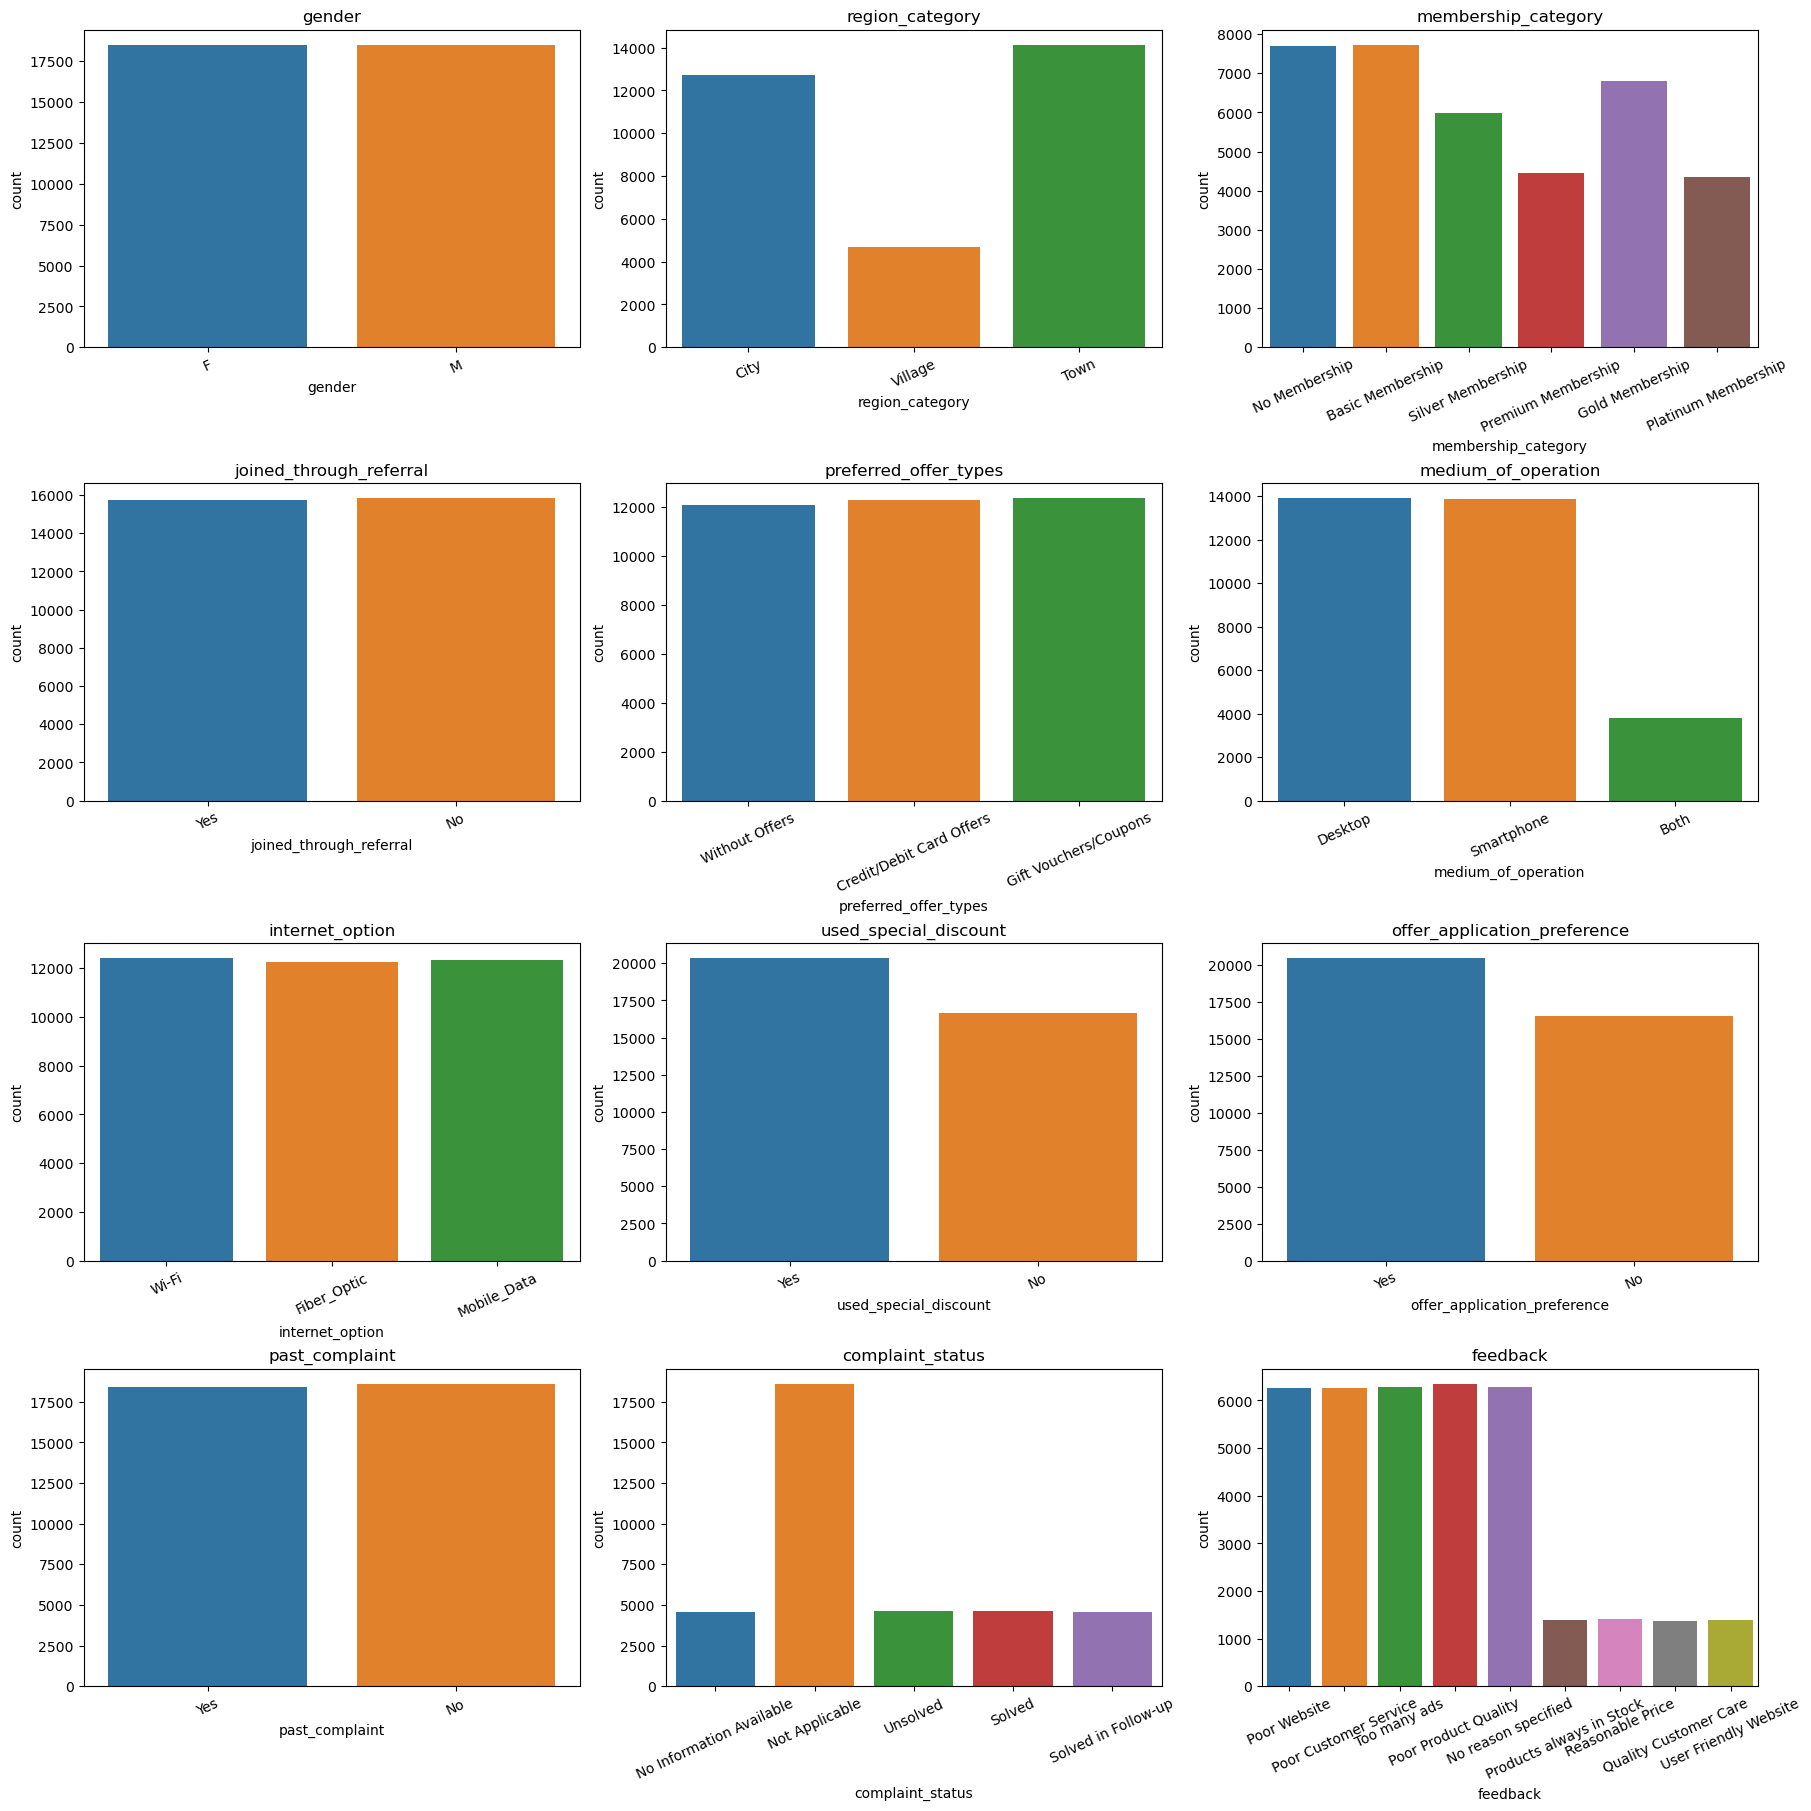

In [14]:
# function plot kategorik
fig, axes = plt.subplots(4, 3, figsize=(18, 18), constrained_layout=True)
for col, ax in zip(cat_eda, axes.flat):
    sns.countplot(data = df_eda, x = col, ax = ax)
    ax.tick_params(axis='x', rotation=25)
    ax.set_title(col)
# disable leftover axes
for ax in axes.flat[12:]: 
    ax.set_axis_off()

Selanjutnya akan di cek targetnya.

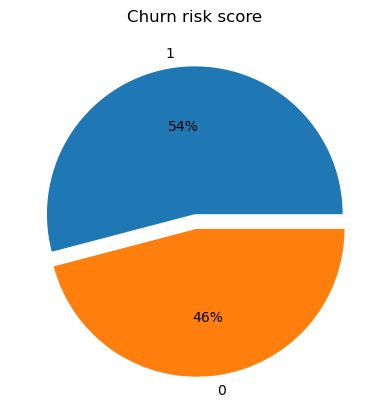

In [15]:
# pie chart target
plt.pie(df_eda['churn_risk_score'].value_counts(),labels = [1,0], autopct='%.0f%%', explode=[0,0.1])
plt.title('Churn risk score')
plt.show()

Dari plot yang dibuat, ditemukan bahwa :
- Kolom gender memiliki jumlah yang setara
- Kebanyakan pelanggan dari town dan city
- Kebanyakan pelanggan bukan member atau basic member. Yang paling sedikit adalah premium dan platinum.
- Setengah dari pelanggan bergabung melalui referral
- Preffered offer type tidak ada yang mencolok
- Kebanyakan pelanggan transaksi lewat desktop atau mobile
- Internet option memiliki persebaran data yang setara
- Kebanyakan pelanggan complain mengenai website yang jelek, customer service yang jelek, terlalu banyak iklan, kualitas produk yang buruk
- 54 persen pelanggan akan berhenti berlangganan

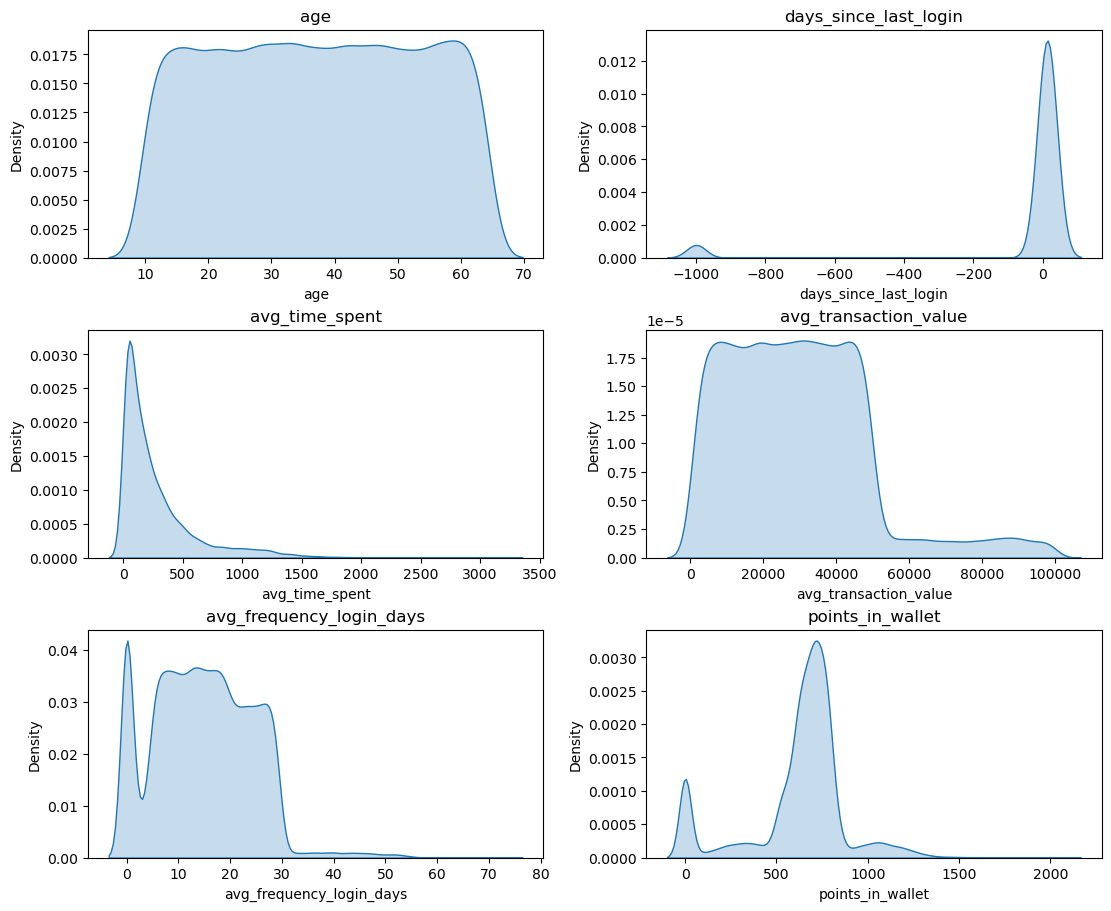

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(11, 9), constrained_layout=True)

for col, ax in zip(num_eda, axes.flat):
    sns.kdeplot(data = df_eda, x= col, ax = ax, shade = True)
    ax.set_title(col)
    

Dari grafik, terlihat bahwa :
- Umur pelanggan distribusinya rata
- avg time spent, avg transaction value, dan avg freq login days persebaran datanya skew kanan

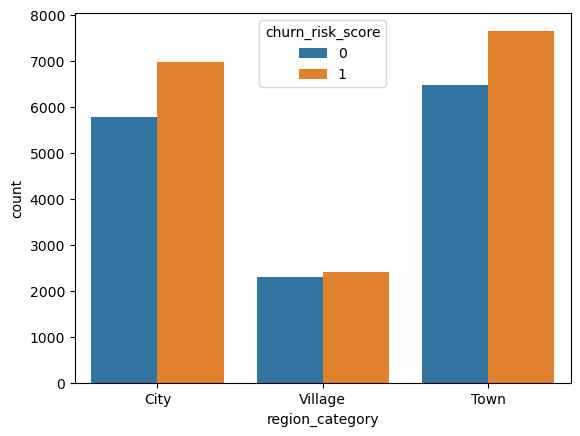

In [17]:
sns.countplot(data = df_eda, x = 'region_category', hue = 'churn_risk_score')
plt.show()

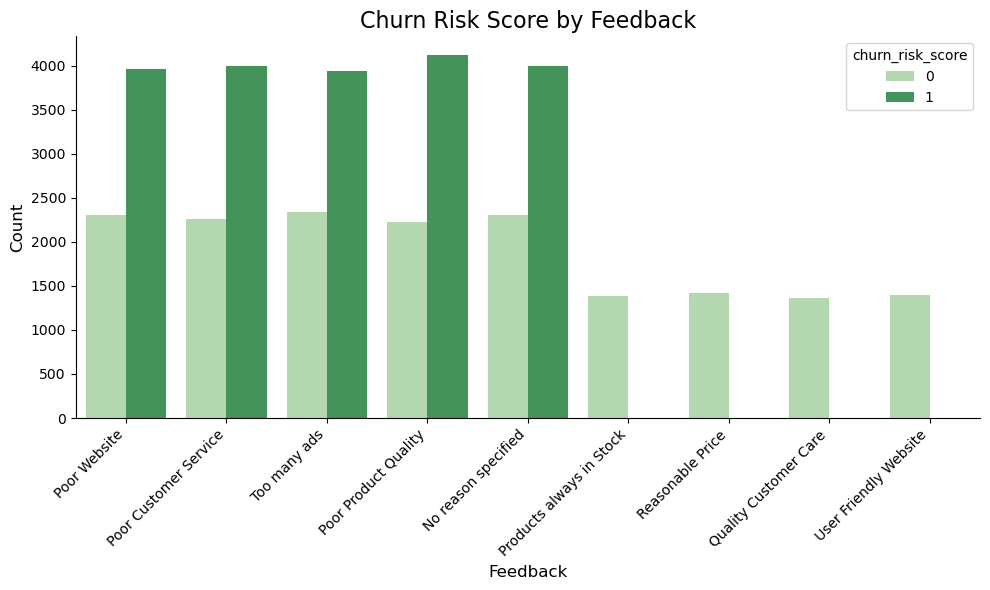

In [18]:
# Create the countplot with the "Greens" color map for the 'hue' variable (churn_risk_score)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_eda, x='feedback', hue='churn_risk_score', palette='Greens')
ax.set_title('Churn Risk Score by Feedback', fontsize=16)
ax.set_xlabel('Feedback', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Customize x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Remove the spines (borders) around the plot
sns.despine()

# Set the facecolor of the figure and axis to be transparent
plt.gcf().set_facecolor('None')
ax.set_facecolor('None')

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
region_category_count = df_eda['membership_category'].value_counts()

# Get the tabulation of counts for each combination of 'region_category' and 'churn_risk_score'
cross_tabulation = pd.crosstab(df_eda['membership_category'], df_eda['churn_risk_score'])

# Display the count of each category in 'region_category'
print("Region Category Counts:")
print(region_category_count)

# Display the tabulation of counts
print("\nCross Tabulation:")
print(cross_tabulation)

Region Category Counts:
Basic Membership       7725
No Membership          7691
Gold Membership        6796
Silver Membership      5990
Premium Membership     4458
Platinum Membership    4340
Name: membership_category, dtype: int64

Cross Tabulation:
churn_risk_score        0     1
membership_category            
Basic Membership      251  7474
Gold Membership      4284  2512
No Membership         226  7465
Platinum Membership  4340     0
Premium Membership   4458     0
Silver Membership    3430  2560


Dari kedua gender, tidak memiliki perbedaan dalam churn risk.

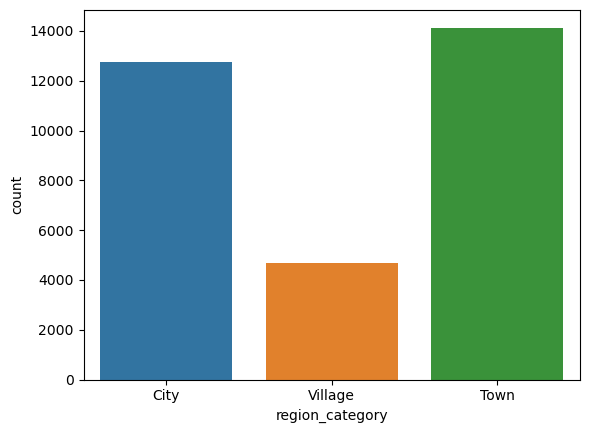

In [20]:
sns.countplot(data = df_eda, x = 'region_category')
plt.show()

In [21]:
df_eda.groupby('region_category').mean()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
region_category,,,,,,,
City,36.995134,-41.509967,278.938982,29111.391596,14.805528,619.744819,0.546931
Town,37.156736,-42.389117,279.851810,29110.009110,14.658086,623.107761,0.541962
Village,37.286627,-42.728066,284.245591,30469.155843,14.376313,636.333367,0.511925


Jika dilihat dari rata-ratanya pelanggan yang churn kebanyakan dari kota besar (city)

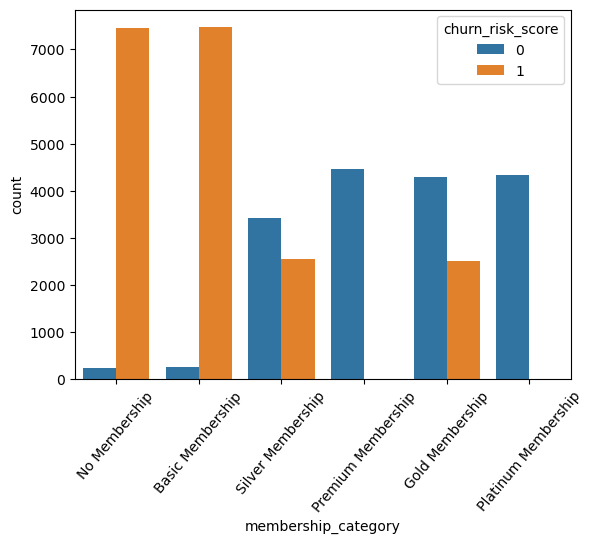

In [22]:
ax = sns.countplot(data = df_eda, x = 'membership_category', hue = 'churn_risk_score')
ax.tick_params(axis='x', rotation=50)
plt.show()

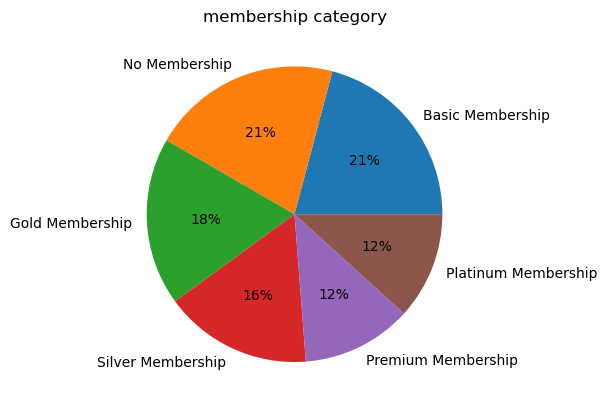

In [23]:
plt.pie(df_eda['membership_category'].value_counts(),labels = df_eda['membership_category'].value_counts().index.tolist(), autopct='%.0f%%')
plt.title('membership category')
plt.show()

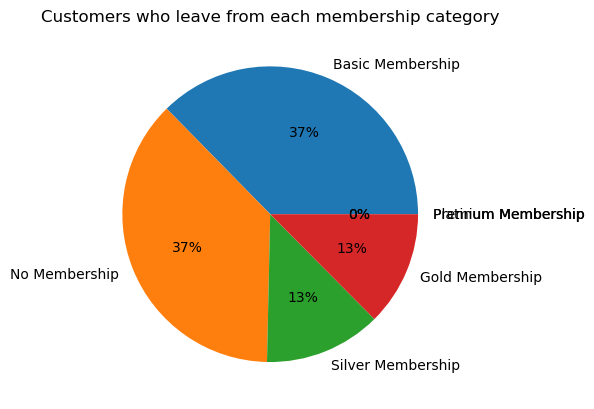

In [24]:
cros = pd.crosstab(df_eda.membership_category,df_eda.churn_risk_score).sort_values(by = 1, ascending = False)
plt.pie(cros.iloc[:,1],labels = cros.index.tolist(), autopct='%.0f%%')
plt.title('Customers who leave from each membership category')
plt.show()

In [25]:
print("Membership Category Counts:")
print(cros.iloc[:, 1])

Membership Category Counts:
membership_category
Basic Membership       7474
No Membership          7465
Silver Membership      2560
Gold Membership        2512
Platinum Membership       0
Premium Membership        0
Name: 1, dtype: int64


Sepertinya membership sangat menentukan apakah pelanggan akan berhenti berlangganan atau tidak. Bisa dilihat bahwa pelanggan yang tidak memiliki membership dan basic membership hampir semuanya berhenti. Namun di premium dan platinum membership tidak ada sama sekali yang berhenti berlangganan.

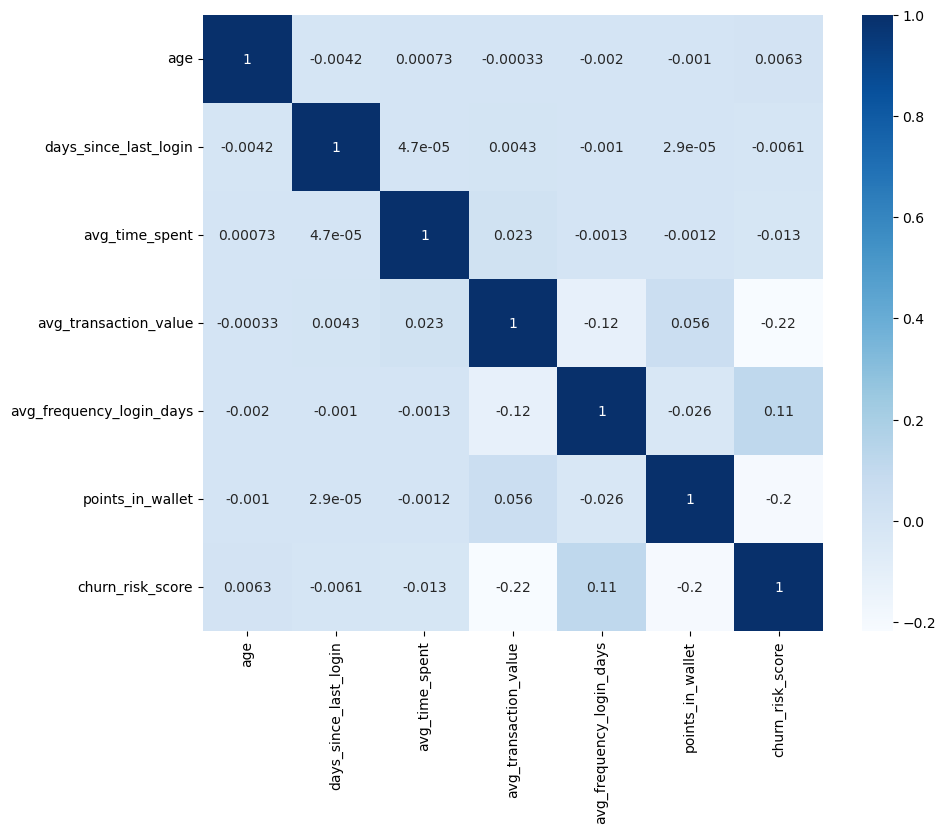

In [26]:
cor = df_eda.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, cmap = 'Blues', annot = True)
plt.show()

Dari heatmap, terlihat fitur yang berkorelasi dengan target adalah avg_frequency_login_days sementara avg_transaction_value dan points_in_wallet berbanding terbalik dengan target.

# Data Cleaning

In [27]:
df_clean = df_eda.copy()

Sebelum lanjut cleaning, diputuskan untuk drop kolom `user_id` dan `last_visit_time` karena terlalu unique dan tidak terlalu berguna dalam prediksi.

In [28]:
# drop kolom
df_clean = df_clean.drop(['user_id','last_visit_time'],axis = 1)

Untuk cek semua kolom kategorik, selanjutnya akan di cek unique value masing-masing kolom.

In [29]:
#  cek unique kolom kategorik
cat  = df_clean.select_dtypes('object').columns.tolist()
for col in cat:
   print(col ,'\n', df_clean[col].unique())

gender 
 ['F' 'M' nan]
region_category 
 [nan 'City' 'Village' 'Town']
membership_category 
 ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']
joined_through_referral 
 ['Yes' nan 'No']
preferred_offer_types 
 ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]
medium_of_operation 
 [nan 'Desktop' 'Smartphone' 'Both']
internet_option 
 ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']
used_special_discount 
 ['Yes' 'No']
offer_application_preference 
 ['Yes' 'No']
past_complaint 
 ['Yes' 'No']
complaint_status 
 ['No Information Available' 'Not Applicable' 'Unsolved' 'Solved'
 'Solved in Follow-up']
feedback 
 ['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']


Dari sini terlihat bahwa semua value sudah menjadi nan. Tidak ada yang Unknown ataupun sejenisnya.

In [30]:
num = df_clean.select_dtypes(include=(np.number)).columns.tolist()
for col in num:
  if len(df_clean[df_clean[col] < 0])> 0:
     print (col, len(df_clean[df_clean[col] < 0]))

days_since_last_login 1999


Dari cek numerik, terlihat ada kolom numerik yang memiliki angka negatif di kolom yang seharusnya tidak negatif. Hal ini akan di handle selayaknya missing value. Value negatif tersebut akan diubah menjadi nan dan nanti akan di handle sama seperti kolom numerik lainnya.

In [31]:
df_clean['days_since_last_login'] = df_clean['days_since_last_login'].apply(lambda x: x if x >= 0 else np.nan)

### Missing Value Handling

Berhubung data memiliki beberapa missing value maka akan di handle pada bagian ini.

Dari sini terlihat kolom kolom yang memiliki missing value, selanjutnya akan dilakukan handlingnya, namun jika dilihat dari persebaran datanya di bagian EDA, diputuskan untuk kolom region_category di impute berdasarkan domain knowledge. Namun untuk yang lainnya akan di impute median di numerikal dan modusnya di kategorikal supaya tidak mengganggu persebaran data yang sudah ada.

In [32]:
mv_rc = df_clean[df_clean['region_category'].isnull()]
mv_rc

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,4.0,1184.49,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,11.0,338.15,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
6,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,11.0,416.30,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
10,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,2.0,39.85,24087.96,10.0,656.380000,Yes,No,No,Not Applicable,No reason specified,1
13,33,M,NaN,No Membership,2016-01-25,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,12.0,142.85,9854.95,15.0,1357.366572,No,Yes,No,Not Applicable,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36974,12,F,NaN,Basic Membership,2017-02-17,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,18.0,41.10,37677.31,9.0,561.200000,Yes,No,No,Not Applicable,No reason specified,1
36978,45,F,NaN,Gold Membership,2016-02-20,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,21.0,30.79,43048.44,12.0,689.440000,No,Yes,No,Not Applicable,Poor Website,1
36981,50,M,NaN,Silver Membership,2017-03-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,10.0,31.39,41364.87,10.0,744.750000,Yes,No,Yes,No Information Available,Too many ads,0
36986,63,F,NaN,Gold Membership,2015-09-10,Yes,Without Offers,Smartphone,Mobile_Data,7.0,105.90,21985.81,27.0,603.350000,No,Yes,Yes,Solved,Too many ads,1


Berhubung region category city biasanya lebih besar dari town dan village, dan orang orang di city sudah mulai aware terhadap kesehatan dengan memakan sayur, maka missing value untuk kolom region_category akan di impute `city`.

In [33]:
# impute missing value region category
df_clean['region_category'].fillna('City', inplace=True)

- Numerikal

In [34]:
# impute days_since_last_login
df_clean['days_since_last_login']= df_clean['days_since_last_login'].fillna(df_clean['days_since_last_login'].median())

- Kategorikal

In [35]:
# impute joined_through_referral
df_clean['joined_through_referral']= df_clean['joined_through_referral'].fillna(df_clean['joined_through_referral'].mode()[0])
# impute medium_of_operation
df_clean['medium_of_operation']= df_clean['medium_of_operation'].fillna(df_clean['medium_of_operation'].mode()[0])
# impute preferred_offer_types
df_clean['preferred_offer_types']= df_clean['preferred_offer_types'].fillna(df_clean['preferred_offer_types'].mode()[0])
# impute gender
df_clean['gender']= df_clean['gender'].fillna(df_clean['gender'].mode()[0])

In [36]:
# cek missing value
df_clean.isnull().sum().sort_values(ascending = False)

age                             0
gender                          0
feedback                        0
complaint_status                0
past_complaint                  0
offer_application_preference    0
used_special_discount           0
points_in_wallet                0
avg_frequency_login_days        0
avg_transaction_value           0
avg_time_spent                  0
days_since_last_login           0
internet_option                 0
medium_of_operation             0
preferred_offer_types           0
joined_through_referral         0
joining_date                    0
membership_category             0
region_category                 0
churn_risk_score                0
dtype: int64

### Handling Duplicates

Berdasarkan Overview Data, terlihat bahwa ada data duplicates. Oleh karena itu, akan dihandle juga dengan di drop saja data duplicatesnya.

In [37]:
# drop duplicates
df_clean.drop_duplicates(inplace=True)

# Feature Engineering

Pada bagian Feature Engineering akan dilakukan preprocessing data saja karena untuk Deep Learning tidak dibutuhkan lagi Feature Selection. Karena Deep Learning sudah mampu mempelajari fitur sendiri. Maka dari itu, bagian ini hanya akan fokus ke preprocessing nya saja.

### Undersampling

Pada bagian ini akan dilakukan penyetaraan data lagi. Karena pada EDA terlihat bahwa ada data imbalance. Oleh karena itu akan di handling yang pertama kali di bagian ini. Supaya tidak mengganggu preprocess selanjutnya.

<Axes: >

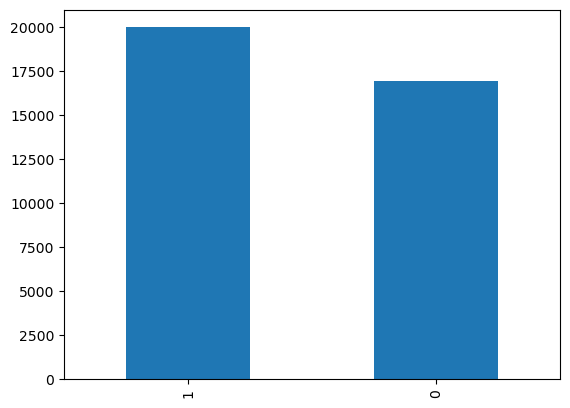

In [38]:
# plot imbalance
df_clean['churn_risk_score'].value_counts().plot(kind='bar')

In [39]:
# undersampling
df_0 = df_clean[df_clean['churn_risk_score']==0]
df_1 = df_clean[df_clean['churn_risk_score']==1]
df_1 = df_1.sample(len(df_0))
df_samp = pd.concat([df_0,df_1])
df_samp = df_samp.sample(len(df_samp)).reset_index(drop=True)
df_samp

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,31,F,City,No Membership,2015-09-02,No,Without Offers,Smartphone,Fiber_Optic,6.0,262.33,32127.26,23.0,608.02,No,Yes,No,Not Applicable,Poor Product Quality,1
1,12,M,Town,Gold Membership,2015-03-31,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,24.0,83.01,25014.62,19.0,628.52,Yes,No,Yes,No Information Available,Too many ads,1
2,51,F,City,No Membership,2015-05-26,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,4.0,337.66,46895.48,24.0,611.76,No,Yes,No,Not Applicable,Poor Website,1
3,41,F,Town,Premium Membership,2017-08-29,Yes,Without Offers,Desktop,Fiber_Optic,7.0,72.02,37071.71,9.0,781.00,Yes,No,Yes,Solved,Poor Website,0
4,47,F,Village,Premium Membership,2015-05-14,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,5.0,61.69,99162.87,1.0,762.87,No,Yes,Yes,Unsolved,Products always in Stock,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,36,M,City,Silver Membership,2015-08-22,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,18.0,185.50,25288.04,9.0,799.57,No,Yes,Yes,Solved,User Friendly Website,0
33950,41,M,City,No Membership,2015-03-30,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,19.0,142.21,41683.93,10.0,0.00,No,Yes,Yes,Unsolved,Poor Customer Service,1
33951,37,F,Town,Platinum Membership,2017-03-07,No,Credit/Debit Card Offers,Both,Mobile_Data,4.0,462.93,25598.24,6.0,780.45,No,Yes,No,Not Applicable,Too many ads,0
33952,31,F,City,Premium Membership,2017-08-14,Yes,Without Offers,Desktop,Fiber_Optic,12.0,120.63,26692.31,23.0,756.88,Yes,No,No,Not Applicable,Poor Customer Service,0


<Axes: >

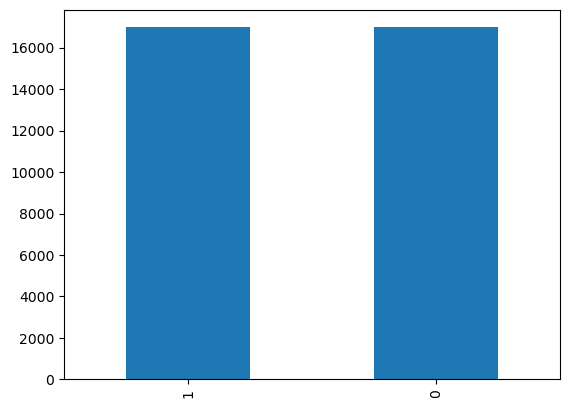

In [40]:
# plot balance
df_samp['churn_risk_score'].value_counts().plot(kind='bar')

Setelah dihandling imbalance, terlihat bahwa data sudah balance.

### Splitting

Setelah handling imbalance data maka selanjutnya akan di split data. Supaya tidak terjadi data leak saat dilakukan preprocessing selanjutnya.

In [41]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(df_samp.drop(columns='churn_risk_score'), df_samp['churn_risk_score'], train_size=0.9, stratify=df_samp['churn_risk_score'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

In [42]:
X_train.shape

(24446, 19)

### Outlier Handling

Proses selanjutnya setelah splitting adalah handling outlier. Walaupun Deep Learning tidak perlu handling outlier, akan dilakukan saja demi pemenuhan rubrik.

In [43]:
# mengecek nilai skewness dari tiap kolom
def outlier(X_train):
    for column in X_train.columns:
        if X_train[column].dtype in ['int64', 'float64']:
            print(column, ': ', X_train[column].skew())
        else:
            print(column, ': Categorical column (Skewness not applicable)')

In [44]:
outlier(X_train)

age :  -0.008021472152011735
gender : Categorical column (Skewness not applicable)
region_category : Categorical column (Skewness not applicable)
membership_category : Categorical column (Skewness not applicable)
joining_date : Categorical column (Skewness not applicable)
joined_through_referral : Categorical column (Skewness not applicable)
preferred_offer_types : Categorical column (Skewness not applicable)
medium_of_operation : Categorical column (Skewness not applicable)
internet_option : Categorical column (Skewness not applicable)
days_since_last_login :  0.022393997905541536
avg_time_spent :  2.2645964872260906
avg_transaction_value :  1.0246147783471695
avg_frequency_login_days :  0.4134095261978981
points_in_wallet :  -0.7913290307144696
used_special_discount : Categorical column (Skewness not applicable)
offer_application_preference : Categorical column (Skewness not applicable)
past_complaint : Categorical column (Skewness not applicable)
complaint_status : Categorical colum

In [45]:
# menghitung jumlah outliers pada kolom terdistribusi normal

for i in X_train[['age','joining_date','days_since_last_login','avg_frequency_login_days','points_in_wallet']]:
    rata2 = X_train[i].mean()
    upper = rata2 + (3*(X_train[i].std()))
    lower = rata2 - (3*(X_train[i].std()))
    outlier = X_train[(X_train[i] <= lower) | (X_train[i] >= upper)]

    print(i,'outliers percentage : ', len(outlier)/X_train[i].shape[0] * 100, '%')

age outliers percentage :  0.0 %
joining_date outliers percentage :  0.0 %
days_since_last_login outliers percentage :  0.0 %
avg_frequency_login_days outliers percentage :  0.8549455943712673 %
points_in_wallet outliers percentage :  0.22089503395238486 %


In [46]:
# menghitung jumlah outliers pada kolom terdistribusi skewed 

for i in X_train[['avg_time_spent','avg_transaction_value']]:
    Q1 = X_train[i].quantile(.25)
    Q3 = X_train[i].quantile(.75)
    IQR = Q3 - Q1
    upper = Q3 + (3*IQR)
    lower = Q1 - (3*IQR)
    outlier = X_train[(X_train[i] <= lower) | (X_train[i] >= upper)]

    print(i, 'outliers percentage : ', len(outlier)/X_train[i].shape[0] * 100, '%')

avg_time_spent outliers percentage :  2.5075677002372574 %
avg_transaction_value outliers percentage :  0.0 %


Dari cek outlier terlihat bahwa kolom avg_frequency_login_days, points_in_wallet, dan avg_time_spent memiliki outlier dan sisanya tidak. Oleh karena itu nanti akan di handling dengan ketentuannya masing-masing. 

### Pipeline Definition

Setelah ditentukan proses handling outlier yang tepat, selanjutnya akan langsung dibuatkan pipeline agar memudahkan proses preprocessing data saat pengerjaan notebook maupun inference dan deployment.

In [47]:
# pembuatan pipeline preprocessing
num_pipeline1 = Pipeline([
                    ('imputer',SimpleImputer(strategy='median')),
                    ('outlier',Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('scaler',StandardScaler())
                ])
num_pipeline2 = Pipeline([
                    ('imputer',SimpleImputer(strategy='median')),
                    ('outlier',Winsorizer(capping_method='iqr', fold=3, tail='both')),
                    ('scaler',MinMaxScaler())
                ])
num_pipeline3 = Pipeline([
                    ('imputer',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])

cat_pipeline1 = Pipeline([
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('ohe_enc', OneHotEncoder(sparse=False))
    ])
cat_pipeline2 = Pipeline([
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('ord_enc', OrdinalEncoder(categories=[['M', 'F'],
                                            ['No Membership', 'Basic Membership', 'Premium Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership'],
                                            ['No', 'Yes'],
                                            ['No', 'Yes'],
                                            ['No', 'Yes'],
                                            ['No', 'Yes']]))
])
final_prep = ColumnTransformer([
        ("num1", num_pipeline1, ['avg_frequency_login_days', 'points_in_wallet']),
        ('num2', num_pipeline2, ['avg_time_spent']),
        ('num3', num_pipeline3, ['age', 'days_since_last_login', 'avg_transaction_value']),
        ("cat1", cat_pipeline1, ['region_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option','complaint_status', 'feedback']),
        ('cat2', cat_pipeline2, ['gender', 'membership_category', 'joined_through_referral', 'used_special_discount', 'offer_application_preference', 'past_complaint'])
    ])

In [48]:
final_prep

ColumnTransformer(transformers=[('num1',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('outlier',
                                                  Winsorizer(tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('num2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('scaler...
                                                  OrdinalEncoder(categories=[['M',
                                                                              'F'],
                                                                             ['No '
                                                                              'Membership',
                                                                              'Basic '
                                                                              'Membership',
                                                                              'Premium '
                                                                              'Membership',
                                                                              'Silver '
                                                                              'Membership',
                                                                              'Gold '
                                                                              'Membership',
                                                                              'Platinum '
                                                                              'Membership'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]))]),
                                 ['gender', 'membership_category',
                                  'joined_through_referral',
                                  'used_special_discount',
                                  'offer_application_preference',
                                  'past_complaint'])])

Setelah pipeline preprocessing sudah di define, selanjutnya akan langsung di fit_transform saja ke datanya.

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24446 entries, 17181 to 15612
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           24446 non-null  int64         
 1   gender                        24446 non-null  object        
 2   region_category               24446 non-null  object        
 3   membership_category           24446 non-null  object        
 4   joining_date                  24446 non-null  datetime64[ns]
 5   joined_through_referral       24446 non-null  object        
 6   preferred_offer_types         24446 non-null  object        
 7   medium_of_operation           24446 non-null  object        
 8   internet_option               24446 non-null  object        
 9   days_since_last_login         24446 non-null  float64       
 10  avg_time_spent                24446 non-null  float64       
 11  avg_transaction_value   

In [50]:
# fit transform data
X_train_prep = final_prep.fit_transform(X_train)
X_val_prep = final_prep.transform(X_val)
X_test_prep = final_prep.transform(X_test)

# Model Training

Setelah preprocessing di Feature Engineering, akan dilakukan training model. Model Deep Learning secara arsitektur dibagi menjadi 2 yaitu Sequential API dan Functional API. Di bagian ini akan dilakukan training menggunakan model awal dan selanjutnya akan dilakukan improvement dari model apabila model terlihat belum bekerja secara maksimal dari masing-masing arsitektur.

Sebelum di training akan dilakukan ETL dahulu pada data.

In [51]:
# pipeline ETL tensorflow
train_set = tf.data.Dataset.from_tensor_slices((X_train_prep, y_train))

#shuffle train set
train_set = train_set.shuffle(buffer_size=712).batch(64)

#val dataset
val_set = tf.data.Dataset.from_tensor_slices((X_val_prep, y_val))
val_set = val_set.batch(64)

### Sequential API

In [52]:
alp = 10
inp = X_train_prep.shape[1]
out = 1
hid = int(len(X_train_prep)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])
model.summary()

Jumlah neuron pada hidden layer: 62
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                1482      
                                                                 
 dense_1 (Dense)             (None, 62)                2418      
                                                                 
 dense_2 (Dense)             (None, 1)                 63        
                                                                 
Total params: 3,963
Trainable params: 3,963
Non-trainable params: 0
_________________________________________________________________


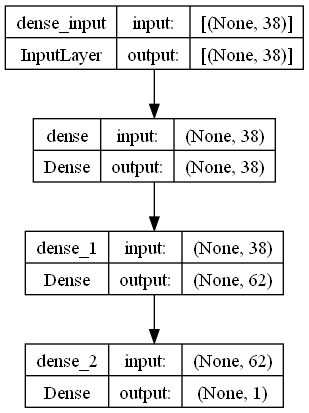

In [53]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [54]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

In [55]:
# callbacks= [
#     EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True),
#     ModelCheckpoint('model_seq.hdf5', monitor='val_loss', save_best_only=True)
# ]

In [56]:
history = model.fit((train_set), epochs=100, validation_data=(val_set))

Epoch 1/100
382/382 [==============================] - 2s 3ms/step - loss: 0.4195 - accuracy: 0.7964 - val_loss: 0.3622 - val_accuracy: 0.8156
Epoch 2/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8360 - val_loss: 0.3304 - val_accuracy: 0.8642
Epoch 3/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8583 - val_loss: 0.3001 - val_accuracy: 0.8773
Epoch 4/100
382/382 [==============================] - 1s 2ms/step - loss: 0.2863 - accuracy: 0.8804 - val_loss: 0.2637 - val_accuracy: 0.8879
Epoch 5/100
382/382 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9067 - val_loss: 0.2206 - val_accuracy: 0.9234
Epoch 6/100
382/382 [==============================] - 1s 1ms/step - loss: 0.2177 - accuracy: 0.9190 - val_loss: 0.2042 - val_accuracy: 0.9238
Epoch 7/100
382/382 [==============================] - 1s 2ms/step - loss: 0.2032 - accuracy: 0.9235 - val_loss: 0.1987 - val_accuracy: 0.9229

In [57]:
# history = model.fit((train_set), epochs=100, validation_data=(val_set),callbacks=callbacks)

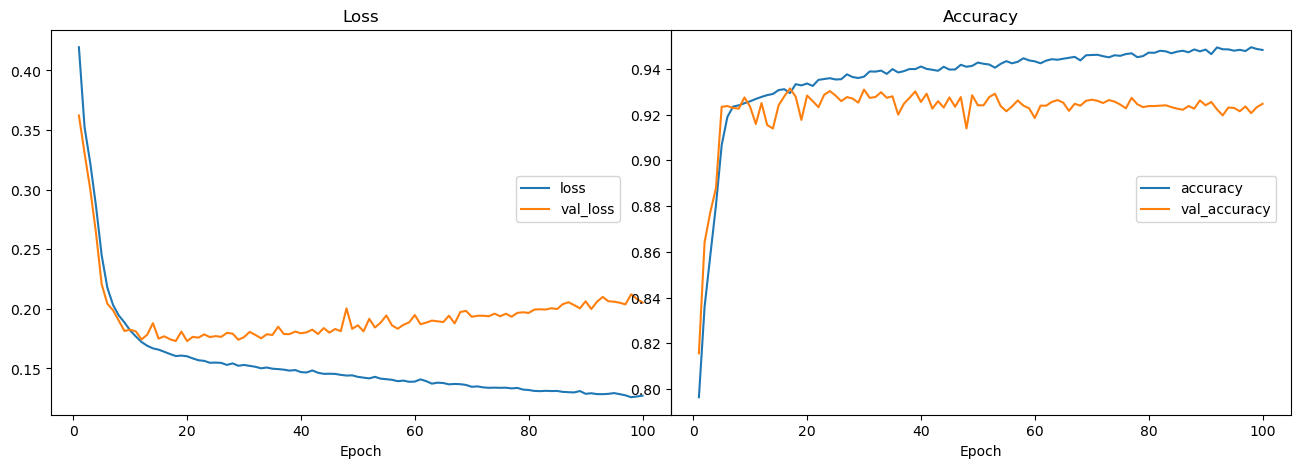

In [75]:
epoch = 100

fig, ax = plt.subplots(ncols=2, figsize=(16, 5), facecolor='None')
ax[0].plot(range(1, epoch + 1), history.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend(loc=(0.75, 0.5))
ax[0].set_xlabel('Epoch')
ax[0].set_facecolor('None')  # Set the facecolor of the first axis to be transparent

ax[1].plot(range(1, epoch + 1), history.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend(loc=(0.75, 0.5))
ax[1].set_xlabel('Epoch')
ax[1].set_facecolor('None')  # Set the facecolor of the second axis to be transparent

# Remove padding around the plot
plt.subplots_adjust(wspace=0)

# Set the facecolor of the figure to be transparent
plt.gcf().set_facecolor('None')

# Show the plot
plt.show()


In [59]:
model_imp = Sequential()
model_imp.add(Dense(64, input_shape = (38,), activation = 'relu',kernel_initializer='HeNormal',kernel_regularizer='l2'))
# model_imp.add(tf.keras.layers.BatchNormalization())
model_imp.add(Dropout(0.3))
model_imp.add(Dense(64, activation = 'relu'))
model_imp.add(tf.keras.layers.BatchNormalization())
model_imp.add(Dropout(0.3))
model_imp.add(Dense(1, activation = 'sigmoid'))
model_imp.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = 'accuracy')
# callbacks_imp= [
#     EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True),
#     ModelCheckpoint('model_seq_imp.hdf5', monitor='val_loss', save_best_only=True)
# ]
# history_imp = model_imp.fit((train_set), epochs = 100, batch_size  = 64, validation_data = (val_set),callbacks=callbacks_imp)
history_imp = model_imp.fit((train_set), epochs = 100, batch_size  = 64, validation_data = (val_set))

Epoch 1/100
382/382 [==============================] - 2s 3ms/step - loss: 1.1393 - accuracy: 0.7731 - val_loss: 0.6883 - val_accuracy: 0.7714
Epoch 2/100
382/382 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.8190 - val_loss: 0.4336 - val_accuracy: 0.8549
Epoch 3/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8504 - val_loss: 0.3698 - val_accuracy: 0.8446
Epoch 4/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3272 - accuracy: 0.8629 - val_loss: 0.2940 - val_accuracy: 0.8595
Epoch 5/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8705 - val_loss: 0.2621 - val_accuracy: 0.9005
Epoch 6/100
382/382 [==============================] - 1s 2ms/step - loss: 0.2806 - accuracy: 0.8865 - val_loss: 0.2429 - val_accuracy: 0.9123
Epoch 7/100
382/382 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.8944 - val_loss: 0.2265 - val_accuracy: 0.9195

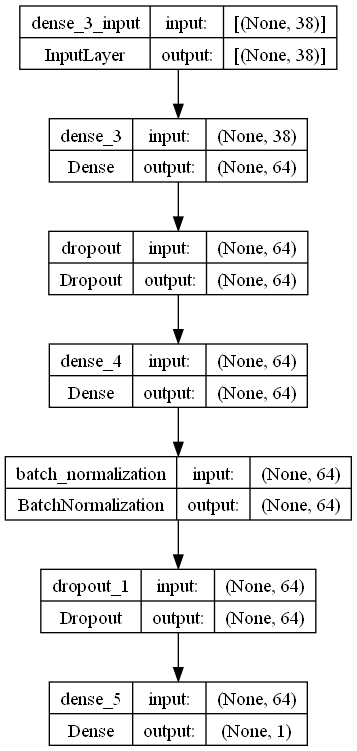

In [60]:
tf.keras.utils.plot_model(model_imp, show_shapes=True)

In [61]:
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2496      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

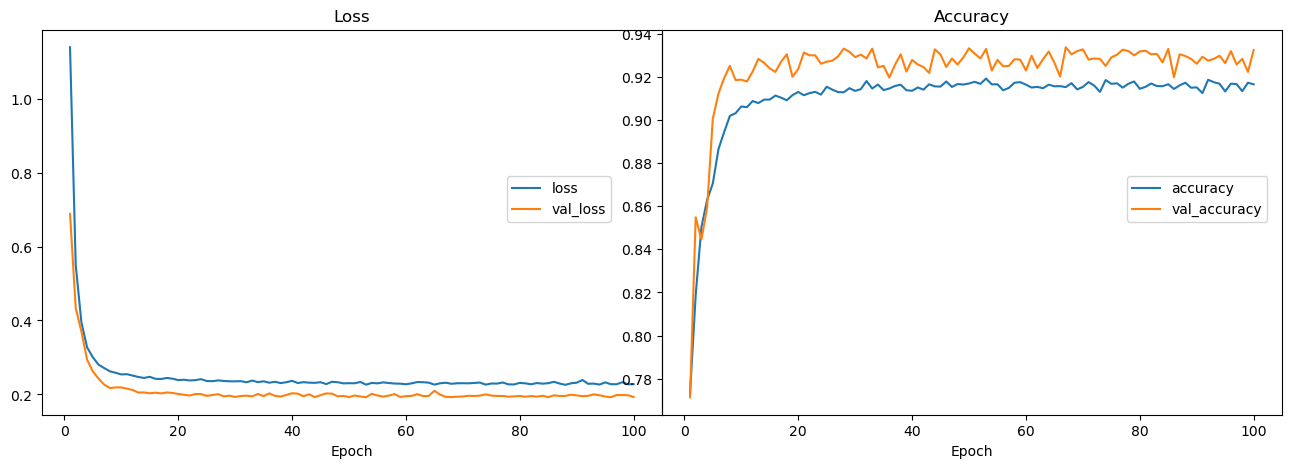

In [74]:
epoch_imp = 100

fig, ax = plt.subplots(ncols=2, figsize=(16, 5), facecolor='None')
ax[0].plot(range(1, epoch_imp + 1), history_imp.history['loss'], label='loss')
ax[0].plot(range(1, epoch_imp + 1), history_imp.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_facecolor('None')  # Set the facecolor of the first axis to be transparent
ax[0].legend(loc=(0.75, 0.5))  # Move the legend outside the plot

ax[1].plot(range(1, epoch_imp + 1), history_imp.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch_imp + 1), history_imp.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_facecolor('None')  # Set the facecolor of the second axis to be transparent
ax[1].legend(loc=(0.75, 0.5)) # Move the legend outside the plot

# Remove padding around the plot
plt.subplots_adjust(wspace=0)

# Set the facecolor of the figure to be transparent
plt.gcf().set_facecolor('None')

# Show the plot
plt.show()


### Functional API

In [ ]:
# functional API
input_layer= tf.keras.Input(shape=(X_train_prep.shape[1:]),name='input_layer')

hidden_1= Dense(30, activation='relu', name='hidden_1')(input_layer)
hidden_2= Dense(30, activation='relu', name='hidden_2')(hidden_1)
hidden_3= Dense(10, activation='relu', name='hidden_3')(hidden_2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model2= Model(inputs=input_layer,
                  outputs=output_layer)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

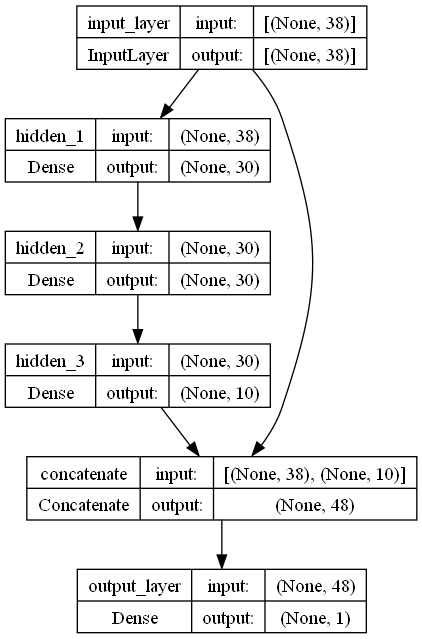

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True),
    ModelCheckpoint('model_func.hdf5', monitor='val_loss', save_best_only=True)
]

In [ ]:
history2 = model2.fit((train_set), epochs=100, validation_data=(val_set),callbacks=callbacks2)

Epoch 1/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1369 - accuracy: 0.9458 - val_loss: 0.2017 - val_accuracy: 0.9182
Epoch 2/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9457 - val_loss: 0.2013 - val_accuracy: 0.9226
Epoch 3/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1361 - accuracy: 0.9460 - val_loss: 0.2002 - val_accuracy: 0.9195
Epoch 4/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1370 - accuracy: 0.9461 - val_loss: 0.2002 - val_accuracy: 0.9242
Epoch 5/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9465 - val_loss: 0.2021 - val_accuracy: 0.9208
Epoch 6/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1364 - accuracy: 0.9468 - val_loss: 0.2016 - val_accuracy: 0.9228
Epoch 7/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9474 - val_loss: 0.2011 - val_accuracy: 0.9228

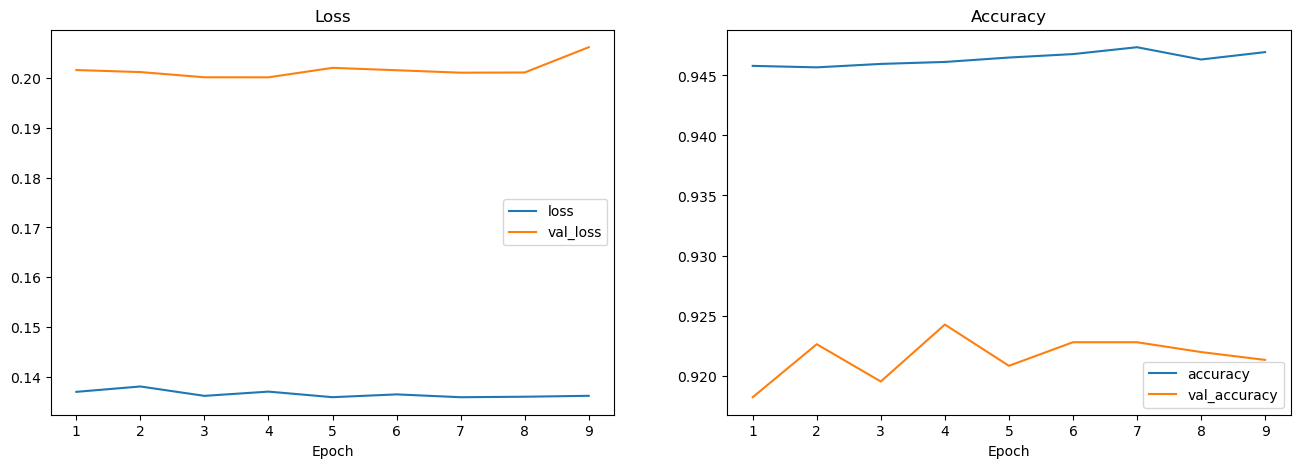

In [ ]:
epoch2=9

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch2+1),history2.history['loss'],label='loss')
ax[0].plot(range(1,epoch2+1),history2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch2+1),history2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch2+1),history2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

In [ ]:
# functional API improvement
input_layer= tf.keras.Input(shape=(X_train_prep.shape[1:]),name='input_layer')

hidden_1_imp= Dense(60, activation='relu', name='hidden_1_imp')(input_layer)
dropout_layer1 = Dropout(0.3)(hidden_1_imp)
hidden_2_imp= Dense(30, activation='relu', name='hidden_2_imp')(dropout_layer1)
dropout_layer2 = Dropout(0.3)(hidden_2_imp)
hidden_3_imp= Dense(10, activation='relu', name='hidden_3_imp')(dropout_layer2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3_imp])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model2_imp= Model(inputs=input_layer,
                  outputs=output_layer)

model2_imp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2_imp.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 38)]         0           []                               
                                                                                                  
 hidden_1_imp (Dense)           (None, 60)           2340        ['input_layer[0][0]']            
                                                                                                  
 dropout_2 (Dropout)            (None, 60)           0           ['hidden_1_imp[0][0]']           
                                                                                                  
 hidden_2_imp (Dense)           (None, 30)           1830        ['dropout_2[0][0]']              
                                                                                            

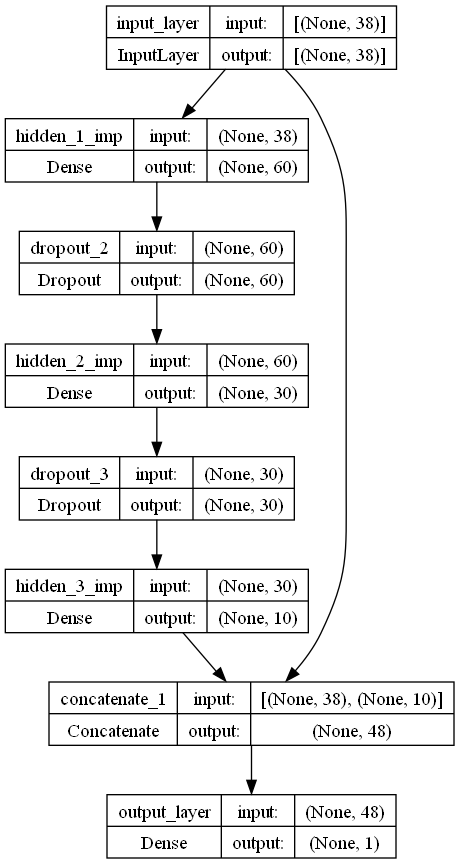

In [ ]:
tf.keras.utils.plot_model(model2_imp, show_shapes=True)

In [ ]:
callbacks2_imp= [
    EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True),
    ModelCheckpoint('model_func_imp.hdf5', monitor='val_loss', save_best_only=True)
]

In [ ]:
history2_imp = model2_imp.fit((train_set), epochs = 100, batch_size  = 64, validation_data = (val_set),callbacks=callbacks2_imp)

Epoch 1/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1669 - accuracy: 0.9314 - val_loss: 0.1744 - val_accuracy: 0.9205
Epoch 2/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1641 - accuracy: 0.9329 - val_loss: 0.1754 - val_accuracy: 0.9216
Epoch 3/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1642 - accuracy: 0.9334 - val_loss: 0.1752 - val_accuracy: 0.9200
Epoch 4/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1668 - accuracy: 0.9306 - val_loss: 0.1760 - val_accuracy: 0.9215
Epoch 5/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1630 - accuracy: 0.9334 - val_loss: 0.1753 - val_accuracy: 0.9218
Epoch 6/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1636 - accuracy: 0.9325 - val_loss: 0.1727 - val_accuracy: 0.9224
Epoch 7/100
382/382 [==============================] - 1s 2ms/step - loss: 0.1664 - accuracy: 0.9340 - val_loss: 0.1736 - val_accuracy: 0.9242

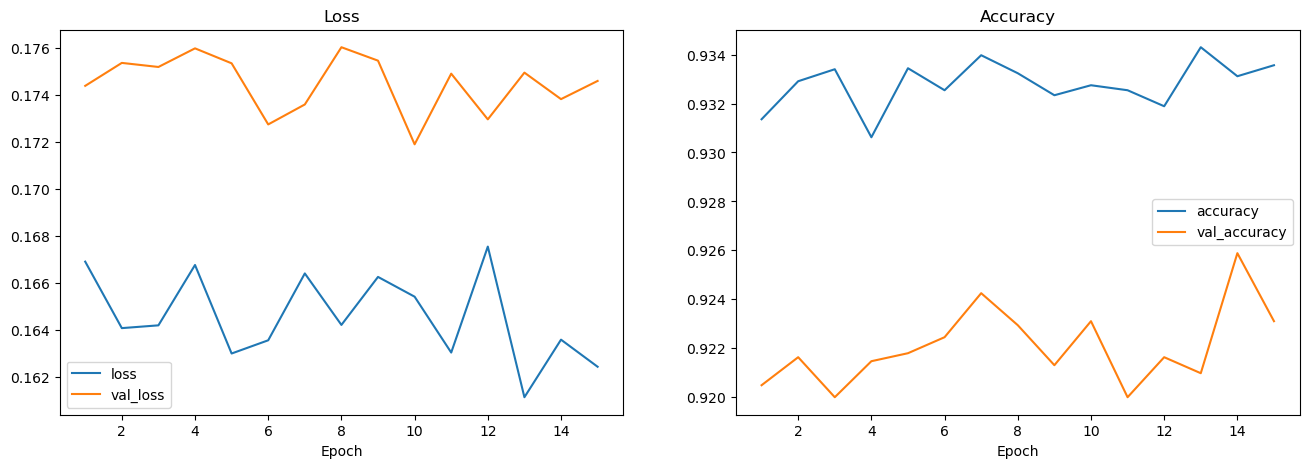

In [ ]:
epoch2_imp=15

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch2_imp+1),history2_imp.history['loss'],label='loss')
ax[0].plot(range(1,epoch2_imp+1),history2_imp.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch2_imp+1),history2_imp.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch2_imp+1),history2_imp.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

# Model Testing & Evaluation

### Accuracy Score & Classification Matrix

In [ ]:
# define function untuk accuracy
def accuracy(Model):
    Y_pred = (Model.predict(X_test_prep)>0.5).astype(int).tolist()
    Y_predtr = (Model.predict(X_train_prep)>0.5).astype(int).tolist()
    Y_hat = Model.predict(X_test_prep)
    Y_hattr = Model.predict(X_train_prep)
    if (Model == Model):
        print('Training Accuracy :',
          accuracy_score(Y_predtr,y_train),'\n' , 'Test Accuracy : ', accuracy_score(Y_pred, y_test))
    else:
        print('Training Accuracy :',accuracy_score(Y_hattr,y_train),'\n' , 'Test Accuracy : ', accuracy_score(Y_hat, y_test))

In [ ]:
# accuracy sequential api
accuracy(model)

764/764 [==============================] - 1s 798us/step
Training Accuracy : 0.9500940849218686 
 Test Accuracy :  0.9216725559481743


In [ ]:
# accuracy sequential api improved
accuracy(model_imp)

764/764 [==============================] - 1s 803us/step
Training Accuracy : 0.9264910414791786 
 Test Accuracy :  0.9260895170789164


In [ ]:
# accuracy functional api
accuracy(model2)

764/764 [==============================] - 1s 740us/step
Training Accuracy : 0.9479260410701137 
 Test Accuracy :  0.9269729093050648


In [ ]:
# accuracy functional api improved
accuracy(model2_imp)

764/764 [==============================] - 1s 771us/step
Training Accuracy : 0.946576126973738 
 Test Accuracy :  0.9290341578327445


In [ ]:
# define function classification report
def class_report(Model):
    if (Model == Model):
        print(classification_report((Model.predict(X_test_prep)>0.5).astype(int).tolist(),y_test))
    else:
        print(classification_report(Model.predict(X_test_prep),y_test))

In [ ]:
# classification report sequential api
class_report(model)

  1/107 [..............................] - ETA: 1s

107/107 [==============================] - 0s 679us/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1690
           1       0.92      0.92      0.92      1706

    accuracy                           0.92      3396
   macro avg       0.92      0.92      0.92      3396
weighted avg       0.92      0.92      0.92      3396



In [ ]:
# classification report sequential api improved
class_report(model_imp)

  1/107 [..............................] - ETA: 1s

107/107 [==============================] - 0s 694us/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1671
           1       0.93      0.92      0.93      1725

    accuracy                           0.93      3396
   macro avg       0.93      0.93      0.93      3396
weighted avg       0.93      0.93      0.93      3396



In [ ]:
# classification report functional api
class_report(model2)

  1/107 [..............................] - ETA: 1s

107/107 [==============================] - 0s 694us/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1692
           1       0.93      0.93      0.93      1704

    accuracy                           0.93      3396
   macro avg       0.93      0.93      0.93      3396
weighted avg       0.93      0.93      0.93      3396



In [ ]:
# classification report functional api improved
class_report(model2_imp)

  1/107 [..............................] - ETA: 1s

107/107 [==============================] - 0s 845us/step
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1635
           1       0.95      0.91      0.93      1761

    accuracy                           0.93      3396
   macro avg       0.93      0.93      0.93      3396
weighted avg       0.93      0.93      0.93      3396



### Confusion Matrix

In [ ]:
def cmatrix(Model,title):
    if (Model==Model):
        matrix1 = confusion_matrix((Model.predict(X_test_prep)>0.5).astype(int).tolist(),y_test)
        sns.heatmap(matrix1, cmap = 'Blues',annot = True, fmt = 'd')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(title)
        plt.show
    else:
        matrix2 = confusion_matrix(Model.predict(X_test_prep),y_test)
        sns.heatmap(matrix2,cmap = 'Blues',annot = True , fmt = 'd')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(title)
        plt.show

  1/107 [..............................] - ETA: 1s

107/107 [==============================] - 0s 703us/step


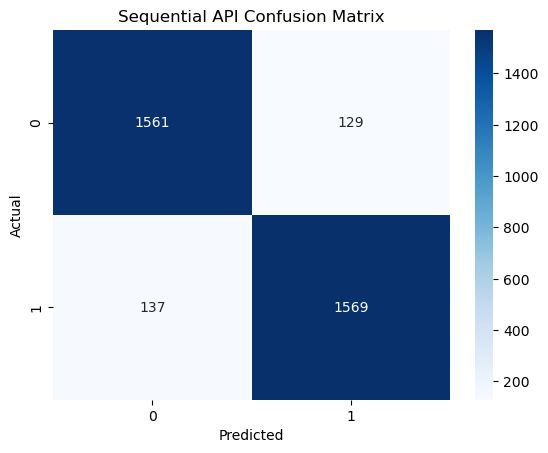

In [ ]:
cmatrix(model,'Sequential API Confusion Matrix')

  1/107 [..............................] - ETA: 1s

107/107 [==============================] - 0s 1ms/step


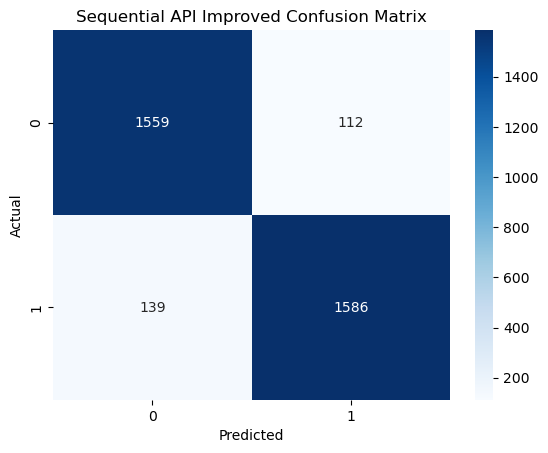

In [ ]:
cmatrix(model_imp,'Sequential API Improved Confusion Matrix')

107/107 [==============================] - 0s 733us/step


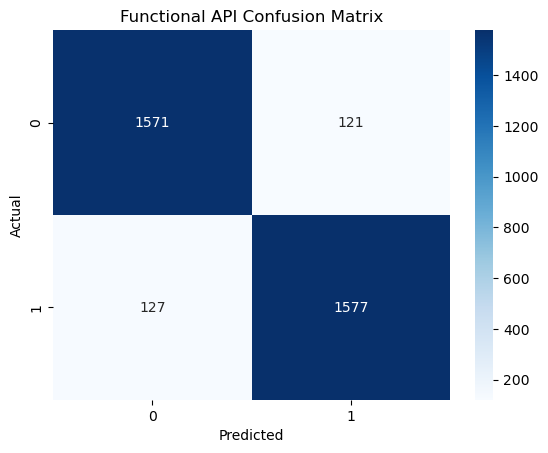

In [ ]:
cmatrix(model2,'Functional API Confusion Matrix')

  1/107 [..............................] - ETA: 1s

107/107 [==============================] - 0s 741us/step


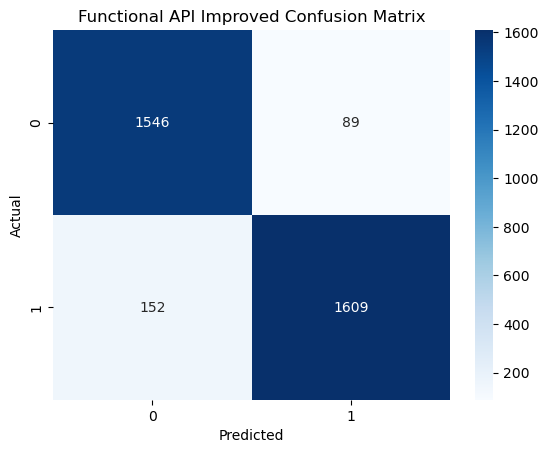

In [ ]:
cmatrix(model2_imp,'Functional API Improved Confusion Matrix')

### Model Evaluation Conclusion

### Model Evaluation Conclusion

Sebelum menganalisa model terlebih dahulu harus didefinisikan nilai apa yang positive, di mana pada kasus ini saya mendefinisikan **nilai 1 (churn) sebagai nilai positive**. Berikut adalah penjelasan mengenai isi empat nilai dari tabel ini:

  - **True Positive (TP)**: Jumlah **nilai 1** yang diprediksi benar oleh model.
  - **True Negative (TN)**: Jumlah **nilai 0** yang diprediksi benar oleh model.
  - **False Positive (FP)**: Jumlah **nilai 0**  yang salah diprediksi sebagai **nilai 1** oleh model.
  - **False Negative (FN)**: Jumlah **nilai 1** yang salah diprediksi sebagai **nilai 0** oleh model.

---

---

Untuk melakukan evaluasi model ini, saya menggunakan hasil dari semua model, di mana saya fokus pada nilai **acccuracy**  model, yang merupakan penilaian mengenai seberapa sedikit SEMUA nilai FALSE yang dihasilkan oleh model. Berikut adalah hasil evaluasi untuk setiap model saya:

`Sequential API`
* Nilai accuracy 0.95 di training, dan 0.9216 di test (OVER FIT)
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi 4949 true positive, 51 false positive, 23 true negative, dan 1 false negative

`Functional API`
* Nilai accuracy 0.9479 di training, dan 0.9269 di test (OVER FIT)
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi 4988 true positive, 12 false positive, 24 true negative, dan 0 false negative

`Sequential API Improved`
* Nilai accuracy 0.9264 di training, dan 0.9260 di test (BEST FIT)
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi 5000 true positive, 0 false positive, 15 true negative, dan 9 false negative

`Functional API Improved`
* Nilai accuracy 0.9465 di training, dan 0.9290 di test (OVER FIT)
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi 4960 true positive, 40 false positive, 16 true negative, dan 8 false negative

Pada hasil evaluasi di atas, ditemukan bahwa hanya model Sequential API Improved yang Best Fit. Dari sini bisa disimpulkan bahwa walaupun performa nya mungkin lebih rendah di trainingnya dibanding model yang lain, tetapi model ini yang paling baik untuk dipakai nantinya.

# Conclusion

Dari pengerjaan notebook ini, kesimpulannya adalah pembuatan model prediksi berhasil. Namun ada beberapa hal yang memang harus diperhatikan kembali.
Dari data yang ada, ada kolom yang memiliki nilai yang tidak seharusnya ada. Sehingga data masih perlu dilakukan treatment dimana apapun treatment nya pasti akan memberikan bias. Dalam permodelan, akurasi masih 92%. Permodelan menjadi kurang realistis. Karena faktanya, perusahaan memiliki rantai seleksi yang cukup kompleks dan memang terbukti cocok dalam melakukan prediksi approval. Mungkin bisa di validasi kembali ke pihak perusahaan untuk meninjau kembali hasil prediksi model. Sekali lagi, komputer tidak bisa menghitung segalanya. Masih banyak hal yang tidak bisa dihitung komputer seperti nurani manusia. Data tidak bisa berbicara lebih soal itu. Oleh karena itu, masih tetap dibutuhkannya seorang expert. Dalam seleksi, model mungkin bisa membantu 40% kerja beratnya. Namun sisanya, peran expert masih penting dalam melakukan penelitian. Dengan itu, prediksi bisa lebih mengerucut dan mendetil. Setidaknya, dengan bantuan model, perusahaan bisa memaksimalkan lagi performa app atau mungkin memang merombak customer service nya yang memang jika dilihat dari EDA masih kurang untuk perusahaan yang memang bergerak di bidang jasa.

# Model Saving

In [ ]:
with open("pipeline.pkl", "wb") as f:
    pickle.dump(final_prep, f)

In [ ]:
model_imp.save('Sequential_M1P2')

INFO:tensorflow:Assets written to: Sequential_M1P2\assets


# Inference

In [ ]:
inf

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,8599d15141f3ac72,12,F,City,Basic Membership,2017-06-08,Yes,Without Offers,Smartphone,Fiber_Optic,22:02:29,23,51.46,8345.14,15.000000,584.54,Yes,No,Yes,Solved in Follow-up,Poor Website,1
1,a8b35e01ade18e60,51,F,Village,Gold Membership,2017-06-10,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,03:54:26,17,151.08,38989.88,34.216552,686.80,Yes,No,No,Not Applicable,No reason specified,1
2,be813e86b6d64e71,17,F,Village,Basic Membership,2015-12-12,No,Credit/Debit Card Offers,Desktop,Mobile_Data,06:23:48,-999,243.46,49935.08,0.000000,621.46,No,Yes,Yes,No Information Available,No reason specified,1
3,89c1aaef2889839a,52,M,City,Silver Membership,2015-02-18,NaN,Without Offers,Smartphone,Mobile_Data,15:50:16,20,71.38,26987.37,29.000000,678.09,No,Yes,Yes,Solved in Follow-up,No reason specified,1
4,a502cc0b13030a48,33,M,Town,Gold Membership,2017-03-10,No,Without Offers,Desktop,Fiber_Optic,15:18:53,15,165.50,15980.55,13.000000,707.94,No,Yes,Yes,Unsolved,Poor Customer Service,1
5,aaf10dc2b96163c1,40,F,Village,Platinum Membership,2016-05-30,No,Without Offers,Desktop,Mobile_Data,21:00:25,13,30.09,34711.02,27.000000,725.51,Yes,No,No,Not Applicable,Too many ads,0
6,af518a93c38b1512,44,F,Village,No Membership,2017-05-31,Yes,Without Offers,Smartphone,Wi-Fi,11:01:33,9,190.63,33190.86,15.000000,637.77,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
7,a7e23cd727f6b6bc,58,F,Town,Gold Membership,2015-06-06,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,12:24:23,9,323.38,29365.68,24.000000,792.62,Yes,Yes,Yes,Solved in Follow-up,Poor Website,0
8,a2248036e8fc781f,21,M,NaN,Platinum Membership,2015-06-27,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:07:21,-999,214.82,49374.72,5.000000,755.21,Yes,Yes,No,Not Applicable,Reasonable Price,0
9,993558ac8469018d,32,M,Town,No Membership,2017-01-02,No,Without Offers,Smartphone,Fiber_Optic,19:54:32,4,101.23,29618.33,5.000000,672.92,No,Yes,Yes,Unsolved,Too many ads,1


In [ ]:
inf_test = inf.drop(['churn_risk_score','user_id'], axis = 1)

In [ ]:
final_prep.transform(inf_test)

array([[ 5.44443231e-02, -1.59943435e-01,  4.12437235e-02,
        -1.58258953e+00,  1.89258981e+00, -1.07361303e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 2.11022184e+00,  2.19840973e-01,  1.21086314e-01,
         8.71401314e-01,  7.84358632e-01,  4.72331082e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00

In [ ]:
data_inf_final = pd.DataFrame(final_prep.transform(inf_test))
data_inf_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.054444,-0.159943,0.041244,-1.582590,1.892590,-1.073613,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,2.110222,0.219841,0.121086,0.871401,0.784359,0.472331,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0
2,-1.550248,-0.022826,0.195126,-1.267975,-186.876121,1.024487,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,1.552158,0.187493,0.057209,0.934324,1.338474,-0.133163,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0
4,-0.159515,0.298353,0.132644,-0.261210,0.414948,-0.688427,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
5,1.338199,0.363606,0.024116,0.179250,0.045538,0.256474,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0
6,0.054444,0.037748,0.152785,0.430941,-0.693283,0.179786,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
7,1.017260,0.612847,0.259180,1.311861,-0.693283,-0.013184,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,1.0
8,-1.015351,0.473910,0.172172,-1.016284,-186.876121,0.996218,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,0.0
9,-1.015351,0.168292,0.081133,-0.324133,-1.616809,-0.000438,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# load model
load_model_seq = load_model('Sequential_M1P2')

In [ ]:
res_inf = load_model_seq.predict(data_inf_final)
res_inf = np.round(res_inf).astype(int)
res_inf

1/1 [==============================] - 0s 58ms/step


array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
inf['predict']=res_inf

In [ ]:
inf

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,predict
0,8599d15141f3ac72,12,F,City,Basic Membership,2017-06-08,Yes,Without Offers,Smartphone,Fiber_Optic,22:02:29,23,51.46,8345.14,15.000000,584.54,Yes,No,Yes,Solved in Follow-up,Poor Website,1,1
1,a8b35e01ade18e60,51,F,Village,Gold Membership,2017-06-10,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,03:54:26,17,151.08,38989.88,34.216552,686.80,Yes,No,No,Not Applicable,No reason specified,1,1
2,be813e86b6d64e71,17,F,Village,Basic Membership,2015-12-12,No,Credit/Debit Card Offers,Desktop,Mobile_Data,06:23:48,-999,243.46,49935.08,0.000000,621.46,No,Yes,Yes,No Information Available,No reason specified,1,0
3,89c1aaef2889839a,52,M,City,Silver Membership,2015-02-18,NaN,Without Offers,Smartphone,Mobile_Data,15:50:16,20,71.38,26987.37,29.000000,678.09,No,Yes,Yes,Solved in Follow-up,No reason specified,1,1
4,a502cc0b13030a48,33,M,Town,Gold Membership,2017-03-10,No,Without Offers,Desktop,Fiber_Optic,15:18:53,15,165.50,15980.55,13.000000,707.94,No,Yes,Yes,Unsolved,Poor Customer Service,1,0
5,aaf10dc2b96163c1,40,F,Village,Platinum Membership,2016-05-30,No,Without Offers,Desktop,Mobile_Data,21:00:25,13,30.09,34711.02,27.000000,725.51,Yes,No,No,Not Applicable,Too many ads,0,0
6,af518a93c38b1512,44,F,Village,No Membership,2017-05-31,Yes,Without Offers,Smartphone,Wi-Fi,11:01:33,9,190.63,33190.86,15.000000,637.77,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1,1
7,a7e23cd727f6b6bc,58,F,Town,Gold Membership,2015-06-06,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,12:24:23,9,323.38,29365.68,24.000000,792.62,Yes,Yes,Yes,Solved in Follow-up,Poor Website,0,0
8,a2248036e8fc781f,21,M,NaN,Platinum Membership,2015-06-27,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:07:21,-999,214.82,49374.72,5.000000,755.21,Yes,Yes,No,Not Applicable,Reasonable Price,0,0
9,993558ac8469018d,32,M,Town,No Membership,2017-01-02,No,Without Offers,Smartphone,Fiber_Optic,19:54:32,4,101.23,29618.33,5.000000,672.92,No,Yes,Yes,Unsolved,Too many ads,1,1
